# Prepare dataset
The purpose of this file is to normalize dataset to have same size along the whole dataset in one run. 
This code finds all files from the directory and cuts each of them into smaller pieces of same *length*, optionally with a *stride*. If the  piece of a file is shorter than a *length* but still longer than a *minimum length treshold* zeroes at the end of a file are padded (to make the size equal to *length*).

To-do list

**Part 1**
* [x] find all files in the directory
* [x] prepare a strategy how to cut files: user gives file length in seconds, but we oparate on array indexes
* [ ] cut sound into pieces 
* [ ] if last file is smaller put zeroes at the end
* [ ] any preprocessing/normalization ?
* [ ] save files

**Part 2**
* [ ] Prepare test, validation and training sets with k-fold validation

## Create list of all files to cut

In [1]:
# find all of the files in the directory
import os

flist=[]
for root, dirs, files in os.walk("../data/xeno-canto-dataset/"):
    for file in files:
        if file.endswith(".mp3"):
            flist.append(os.path.join(root, file))
                
print('Found ', len(flist),' files.')

Found  1792  files.


##  Load example file

../data/xeno-canto-dataset/PhylloscopusCollybita\Czech\PhylloscopusCollybita469800.mp3


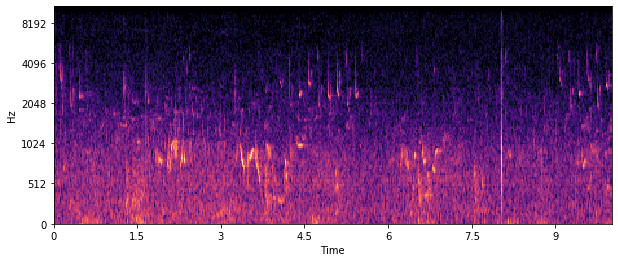

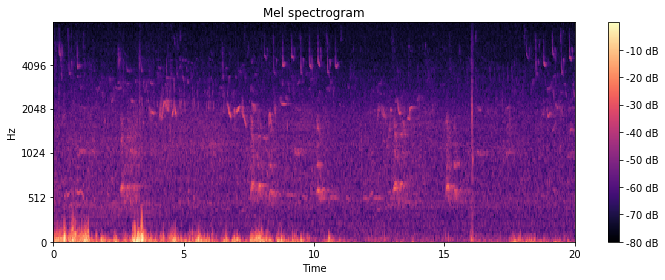

In [60]:
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy import signal
import librosa.display
import numpy as np


N_FFT = 1024         # Number of frequency bins for Fast Fourier Transform
HOP_SIZE = 1024      # Number of audio frames between STFT columns
SR = 44100           # Sampling frequency
N_MELS = 128          # Mel band parameters   
WIN_SIZE = 1024      # number of samples in each STFT window
WINDOW_TYPE = 'hann' # the windowin function
FEATURE = 'mel'      # feature representation
plt.rcParams['figure.figsize'] = (10,4)



filePath = flist[900]
print(filePath)

data, sr = librosa.load(filePath, duration=20) # sr = sampling rate
ipd.display(ipd.Audio(data,rate=sr))

librosa.display.specshow(
            librosa.core.amplitude_to_db(
                librosa.feature.melspectrogram(
                                y=data, 
                                S=np.abs(
                                    librosa.stft(
                                        data, n_fft = N_FFT, 
                                        hop_length = HOP_SIZE, 
                                        window = WINDOW_TYPE, 
                                        win_length = WIN_SIZE)
                                        )**1.5, 
                                sr=SR, 
                                n_fft=N_FFT, 
                                hop_length=HOP_SIZE, 
                                n_mels=N_MELS, 
                                htk=True, 
                                fmin=2000.0, 
                                fmax=sr), 
                    ref=1.0),
                sr=SR,
                hop_length=HOP_SIZE, 
                x_axis='time', 
                y_axis='mel')


# plot mel-spectogram before denosing
S = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,ref=np.max),
                          y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show() 
    

## Find strategy to cut the file
We want to cut files to smaller pieces of the desired size (5 seconds in example), and stride of 1 second. Stride tells us how different pieces of files will overlap at each other.

In [12]:
import sys
from tqdm import tqdm

size = {'desired': 5, 'minimum': 3, 'stride' : 0} # stride should not be bigger than desired length
i=0;

print('Number of file before cutting: ', len(flist))

step = (size['desired']-size['stride'])*sr # length of step between two cuts in seconds
if step>0:
    with tqdm(total=len(flist), file=sys.stdout) as pbar:
        for path in flist:
            pbar.set_description('Processing data...')
            pbar.update(1)
            signal, sr = librosa.load(path) # sr = sampling rate
                        
            for start, end in zip(range(0,len(signal),step),range(size['desired']*sr,len(signal),step)):
                i=i+1
                print('New file...',start/sr,' - ',end/sr)
                print('Start: ',start,'end: ', end, 'length: ', end-start)
else:    
    print("Error: Stride should be lower than desired length.")
    
print('Number of files after cutting: ', i)


Number of file before cutting:  1792
Processing data...:   0%|                                                                     | 0/1792 [00:00<?, ?it/s]New file... 0.0  -  5.0
Start:  0 end:  110250 length:  110250
New file... 5.0  -  10.0
Start:  110250 end:  220500 length:  110250
New file... 10.0  -  15.0
Start:  220500 end:  330750 length:  110250
New file... 15.0  -  20.0
Start:  330750 end:  441000 length:  110250
New file... 20.0  -  25.0
Start:  441000 end:  551250 length:  110250
New file... 25.0  -  30.0
Start:  551250 end:  661500 length:  110250
New file... 30.0  -  35.0
Start:  661500 end:  771750 length:  110250
New file... 35.0  -  40.0
Start:  771750 end:  882000 length:  110250
New file... 40.0  -  45.0
Start:  882000 end:  992250 length:  110250
New file... 45.0  -  50.0
Start:  992250 end:  1102500 length:  110250
New file... 50.0  -  55.0
Start:  1102500 end:  1212750 length:  110250
New file... 55.0  -  60.0
Start:  1212750 end:  1323000 length:  110250
New fil

KeyboardInterrupt: 

#### 

In [ ]:
print(i)